In [29]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [30]:
conn = pymysql.connect(host='localhost', user='root', password='1234',
                       db='sqlteam4_db', charset='utf8')
# cur = conn.cursor()
cur1 = conn.cursor(pymysql.cursors.DictCursor)
cur2 = conn.cursor(pymysql.cursors.DictCursor)

query1 = '''
select y15.city as '연도별 지하철 교통카드 요금', y15.subcardfee as '2015', y16.subcardfee as '2016', y17.subcardfee as '2017', y18.subcardfee as '2018', y19.subcardfee as '2019', y20.subcardfee as '2020', y21.subcardfee as '2021', y22.subcardfee as '2022', y23.subcardfee as '2023', y24.subcardfee as '2024'
from y2015 as y15
	inner join y2016 as y16
	on y15.city = y16.city
	inner join y2017 as y17
	on y16.city = y17.city
	inner join y2018 as y18
	on y17.city = y18.city
	inner join y2019 as y19
	on y18.city = y19.city
	inner join y2020 as y20
	on y19.city = y20.city
	inner join y2021 as y21
	on y20.city = y21.city
	inner join y2022 as y22
	on y21.city = y22.city
	inner join y2023 as y23
	on y22.city = y23.city
	inner join y2024 as y24
	on y23.city = y24.city
where y15.city in ('서울','인천','대구','부산','대전','광주');
'''

query2='''
select y15.city as '연도별 지하철 현금 요금', y15.subcashfee as '2015', y16.subcashfee as '2016', y17.subcashfee as '2017', y18.subcashfee as '2018', y19.subcashfee as '2019', y20.subcashfee as '2020', y21.subcashfee as '2021', y22.subcashfee as '2022', y23.subcashfee as '2023', y24.subcashfee as '2024'
from y2015 as y15
	inner join y2016 as y16
	on y15.city = y16.city
	inner join y2017 as y17
	on y16.city = y17.city
	inner join y2018 as y18
	on y17.city = y18.city
	inner join y2019 as y19
	on y18.city = y19.city
	inner join y2020 as y20
	on y19.city = y20.city
	inner join y2021 as y21
	on y20.city = y21.city
	inner join y2022 as y22
	on y21.city = y22.city
	inner join y2023 as y23
	on y22.city = y23.city
	inner join y2024 as y24
	on y23.city = y24.city
where y15.city in ('서울','인천','대구','부산','대전','광주');
'''

In [31]:
cur1.execute(query1)
cur2.execute(query2)

rows1= cur1.fetchall() # 모든 데이터를 가져옴
rows2= cur2.fetchall() # 모든 데이터를 가져옴

subcardfee_df = pd.DataFrame(rows1)
subcashfee_df = pd.DataFrame(rows2)

cur1.close()
cur2.close()
conn.close() # 데이터베이스 연결 종료

In [32]:
print(subcardfee_df)

  연도별 지하철 교통카드 요금  2015  2016  2017  2018  2019  2020  2021  2022  2023  2024
0              광주  1100  1200  1250  1250  1250  1250  1250  1250  1250  1250
1              대구  1100  1200  1250  1250  1250  1250  1250  1250  1250  1500
2              대전  1100  1400  1250  1250  1250  1250  1250  1250  1250  1550
3              부산  1200  1300  1200  1300  1300  1300  1300  1300  1300  1450
4              서울  1050  1350  1250  1250  1250  1250  1250  1250  1250  1400
5              인천  1050  1350  1250  1250  1250  1250  1250  1250  1250  1400


In [33]:
print(subcashfee_df)

  연도별 지하철 현금 요금  2015  2016  2017  2018  2019  2020  2021  2022  2023  2024
0            광주  1200  1100  1400  1400  1400  1400  1400  1400  1400  1400
1            대구  1200  1100  1400  1400  1400  1400  1400  1400  1400  1700
2            대전  1200  1250  1400  1400  1400  1400  1400  1400  1400  1700
3            부산  1300  1200  1300  1400  1400  1400  1400  1400  1400  1550
4            서울  1150  1250  1350  1350  1350  1350  1350  1350  1350  1500
5            인천  1150  1250  1350  1350  1350  1350  1350  1350  1350  1500


In [34]:
card_title_list = []
for i in range(6):
	card_title_list.append(subcardfee_df.values.tolist()[i][0])
card_title_list

['광주', '대구', '대전', '부산', '서울', '인천']

In [35]:
temp_card = []
for i in subcardfee_df.values.tolist():
	temp_card.append(list(map(int,i[1:])))
temp_card

[[1100, 1200, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1250],
 [1100, 1200, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1500],
 [1100, 1400, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1550],
 [1200, 1300, 1200, 1300, 1300, 1300, 1300, 1300, 1300, 1450],
 [1050, 1350, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1400],
 [1050, 1350, 1250, 1250, 1250, 1250, 1250, 1250, 1250, 1400]]

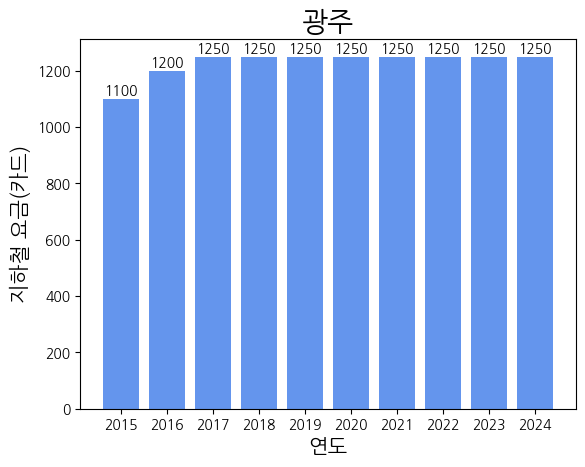

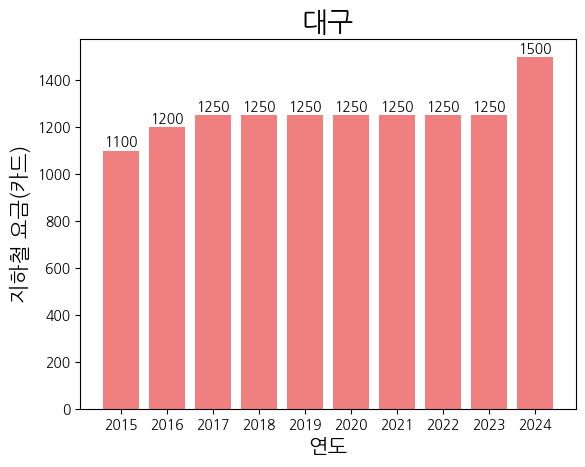

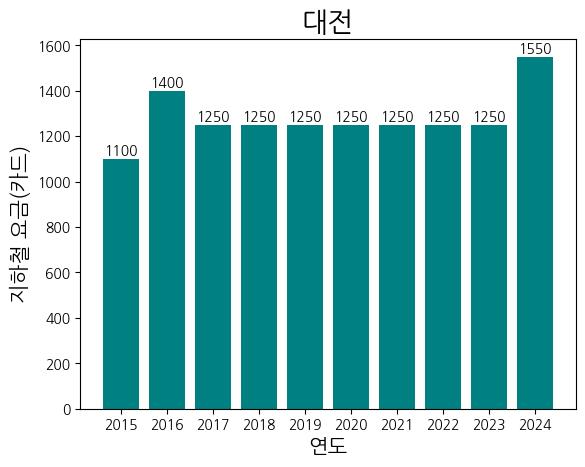

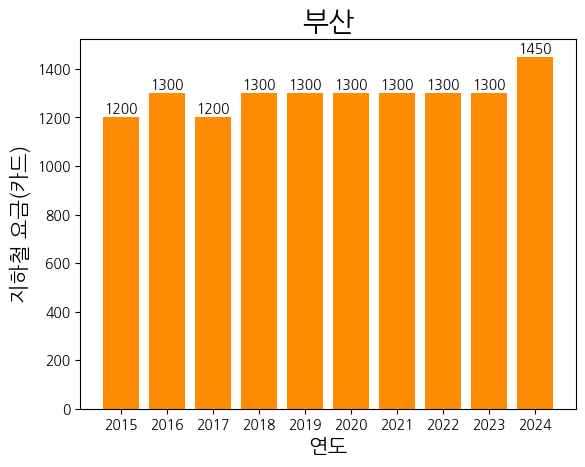

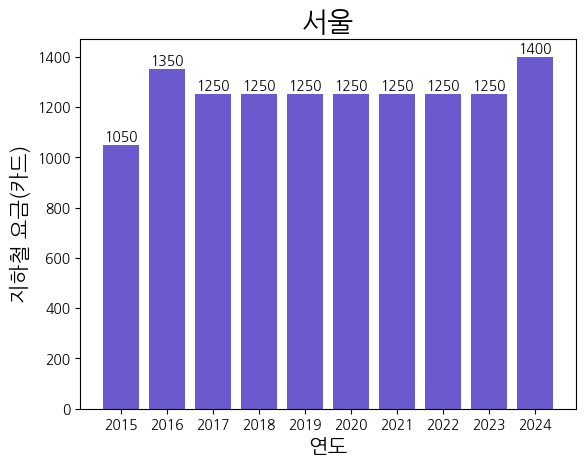

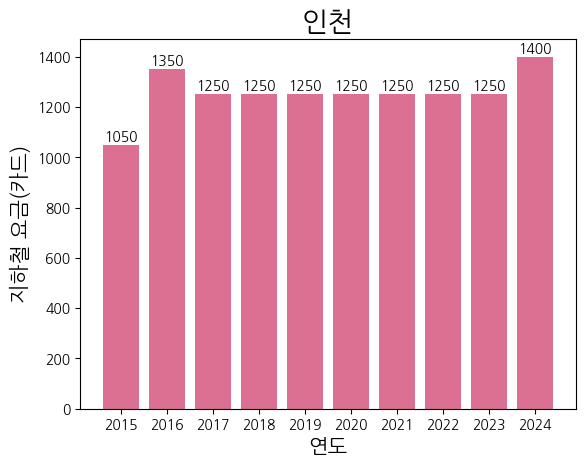

In [36]:
colors=['cornflowerblue','lightcoral','teal','darkorange','slateblue','palevioletred']

for x in range(6):
	bars=plt.bar(subcardfee_df.columns.tolist()[1:], temp_card[x], color=colors[x])
	plt.title(card_title_list[x], fontsize=20)
	plt.xlabel('연도', fontsize=15)
	plt.bar_label(bars, padding=1)
	plt.ylabel('지하철 요금(카드)', fontsize=15)
	plt.show()

In [43]:
cash_title_list = []
for i in range(6):
	cash_title_list.append(subcashfee_df.values.tolist()[i][0])

cash_y = []
for i in subcashfee_df.values.tolist():
	cash_y.append(list(map(int,i[1:])))

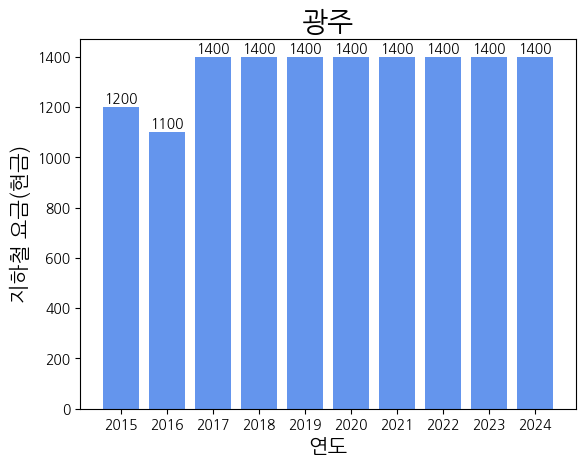

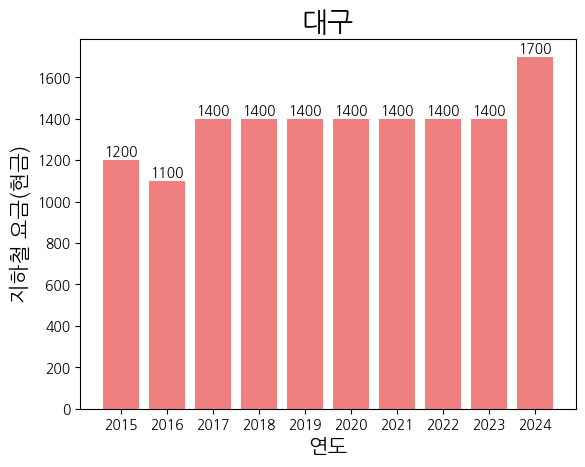

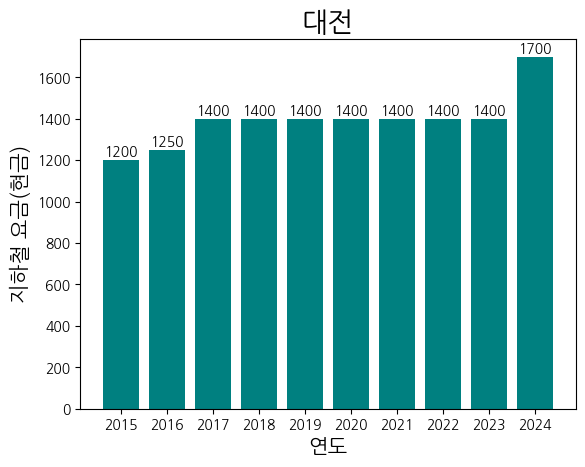

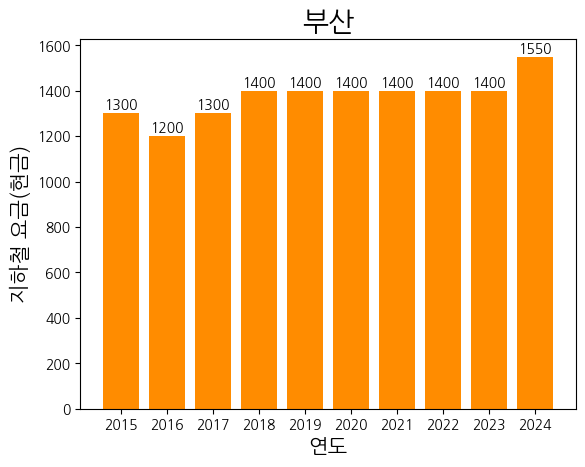

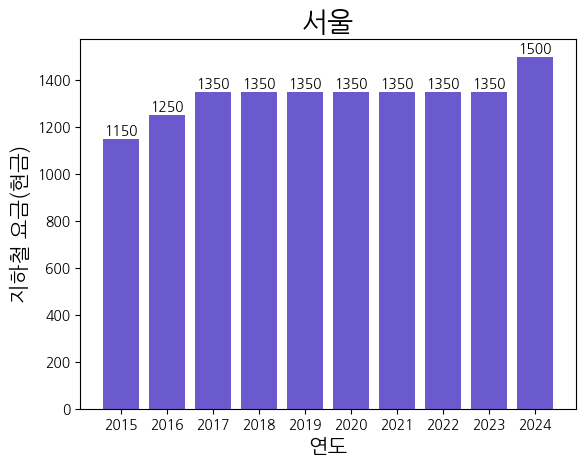

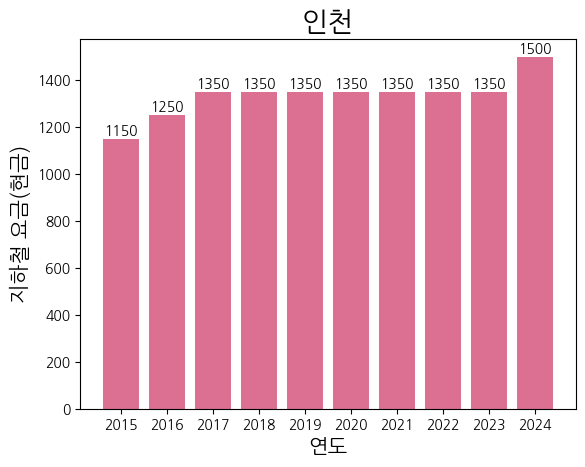

In [47]:
colors=['cornflowerblue','lightcoral','teal','darkorange','slateblue','palevioletred']

for x in range(6):
	bars=plt.bar(subcashfee_df.columns.tolist()[1:], cash_y[x], color=colors[x])
	plt.title(cash_title_list[x], fontsize=20)
	plt.bar_label(bars, padding=1)
	plt.xlabel('연도', fontsize=15)
	plt.ylabel('지하철 요금(현금)', fontsize=15)
	plt.show()

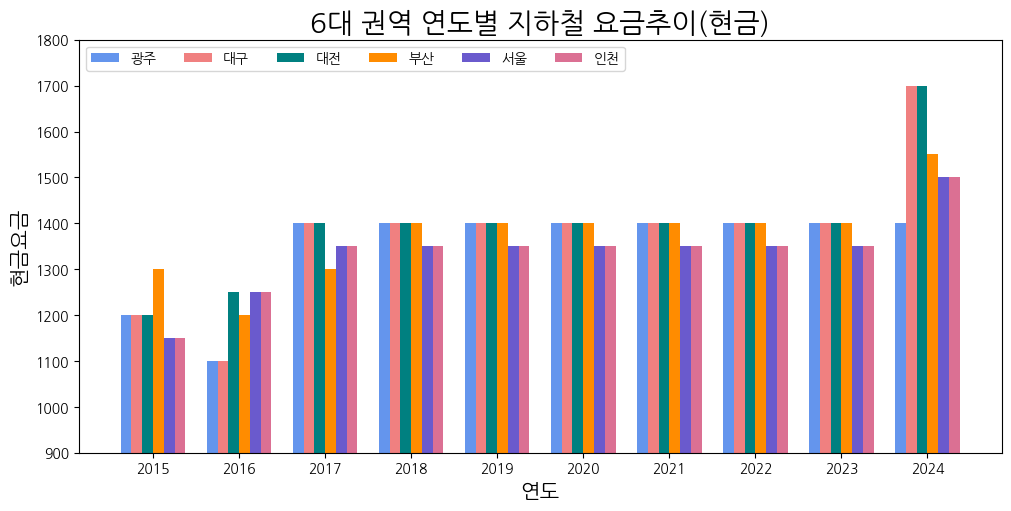

In [46]:
import numpy as np

# x축 데이터
x_axes = subcashfee_df.columns.tolist()[1:]

# y축 데이터
y_axes = [cash_y[0], cash_y[1], cash_y[2], cash_y[3], cash_y[4], cash_y[5]]

# 그래프에 나타낼 x축 위치 값, 막대그래프 너비, 다중 막대 그래프 간격 값
x = np.arange(len(x_axes))  # 숫자 인덱스 배열로 변환
width = 0.125  # 막대의 너비
multiplier = 0  # 막대그래프 간격

# 색깔 추가
colors=['cornflowerblue','lightcoral','teal','darkorange','slateblue','palevioletred']

# 비교 다중그래프
fig, ax = plt.subplots(layout='constrained', figsize=(10, 5))

# 막대그리기
for i in range(6):
    offset = width * multiplier
    rects = ax.bar(x + offset, y_axes[i], width, label=cash_title_list[i], color=colors[i])
    multiplier += 1

# 그래프 title, xticks, legend, ylim ...
ax.set_title('6대 권역 연도별 지하철 요금추이(현금)', fontsize=20)
ax.set_xticks(x + width * (len(y_axes) - 1) / 2)
ax.set_xticklabels(x_axes)
ax.legend(loc='upper left', ncols=6)
ax.set_ylim(900, 1800)

plt.xlabel('연도', fontsize=15)
plt.ylabel('현금요금', fontsize=15)
plt.show()

In [40]:
card_title_list = []
for i in range(6):
	card_title_list.append(subcardfee_df.values.tolist()[i][0])

card_y = []
for i in subcardfee_df.values.tolist():
	card_y.append(list(map(int,i[1:])))

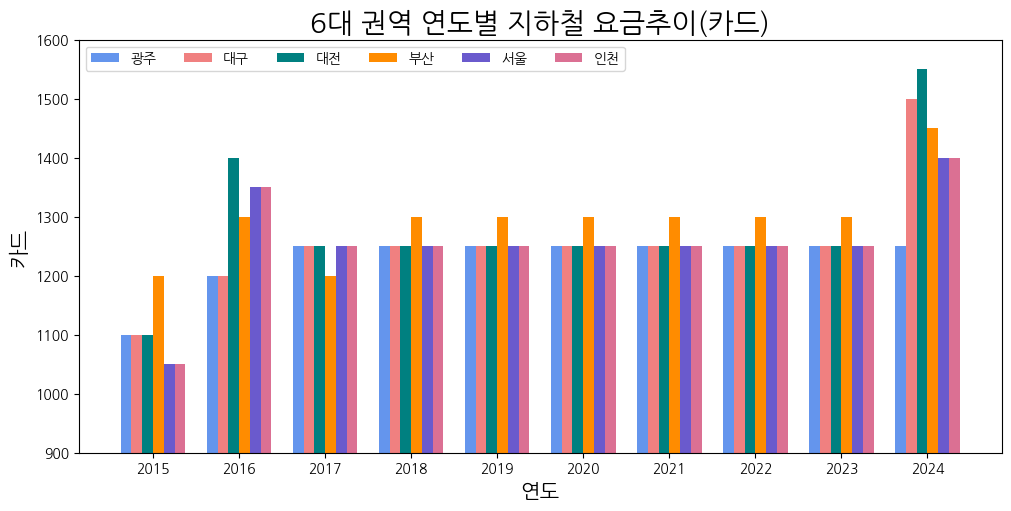

In [44]:
# x축 데이터
x_axes = subcardfee_df.columns.tolist()[1:]

# y축 데이터
y_axes = [card_y[0], card_y[1], card_y[2], card_y[3], card_y[4], card_y[5]]

# 그래프에 나타낼 x축 위치 값, 막대그래프 너비, 다중 막대 그래프 간격 값
x = np.arange(len(x_axes))  # 숫자 인덱스 배열로 변환
width = 0.125  # 막대의 너비
multiplier = 0  # 막대그래프 간격

# 색깔 추가
colors=['cornflowerblue','lightcoral','teal','darkorange','slateblue','palevioletred']

# 비교 다중그래프
fig, ax = plt.subplots(layout='constrained', figsize=(10, 5))

# 막대그리기
for i in range(6):
    offset = width * multiplier
    rects = ax.bar(x + offset, y_axes[i], width, label=cash_title_list[i], color=colors[i])
    multiplier += 1

# 그래프 title, xticks, legend, ylim ...
ax.set_title('6대 권역 연도별 지하철 요금추이(카드)', fontsize=20)
ax.set_xticks(x + width * (len(y_axes) - 1) / 2)
ax.set_xticklabels(x_axes)
ax.legend(loc='upper left', ncols=6)
ax.set_ylim(900, 1600)

plt.xlabel('연도', fontsize=15)
plt.ylabel('카드', fontsize=15)
plt.show()